In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.cluster import KMeans

In [17]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None)

In [18]:
df.columns = ['ID Number', 'Refractive Index', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe','Type']

In [19]:
df.head(5)

,ID Number,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
df = df.drop(['ID Number'], axis = 1)

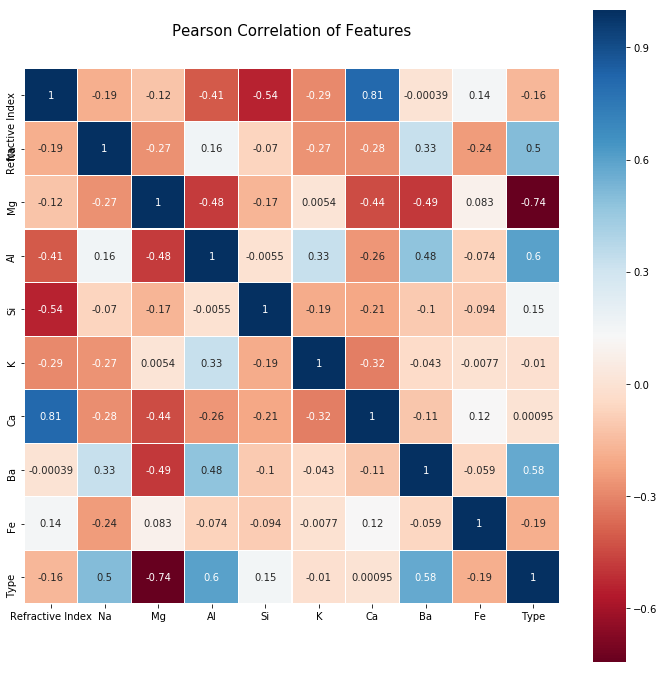

In [21]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)

In [22]:
df.mean()

Refractive Index     1.518365
Na                  13.407850
Mg                   2.684533
Al                   1.444907
Si                  72.650935
K                    0.497056
Ca                   8.956963
Ba                   0.175047
Fe                   0.057009
Type                 2.780374
dtype: float64

In [35]:
x = np.array(df.drop(['Type','Mg','Al','Si','K','Ca','Ba','Fe'], axis=1))

In [36]:
x

array([[  1.52101,  13.64   ],
       [  1.51761,  13.89   ],
       [  1.51618,  13.53   ],
       [  1.51766,  13.21   ],
       [  1.51742,  13.27   ],
       [  1.51596,  12.79   ],
       [  1.51743,  13.3    ],
       [  1.51756,  13.15   ],
       [  1.51918,  14.04   ],
       [  1.51755,  13.     ],
       [  1.51571,  12.72   ],
       [  1.51763,  12.8    ],
       [  1.51589,  12.88   ],
       [  1.51748,  12.86   ],
       [  1.51763,  12.61   ],
       [  1.51761,  12.81   ],
       [  1.51784,  12.68   ],
       [  1.52196,  14.36   ],
       [  1.51911,  13.9    ],
       [  1.51735,  13.02   ],
       [  1.5175 ,  12.82   ],
       [  1.51966,  14.77   ],
       [  1.51736,  12.78   ],
       [  1.51751,  12.81   ],
       [  1.5172 ,  13.38   ],
       [  1.51764,  12.98   ],
       [  1.51793,  13.21   ],
       [  1.51721,  12.87   ],
       [  1.51768,  12.56   ],
       [  1.51784,  13.08   ],
       [  1.51768,  12.65   ],
       [  1.51747,  12.84   ],
       [

In [43]:
dist = []

for i in range(1, 11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1007)
    km.fit(x)
    dist.append(km.inertia_)

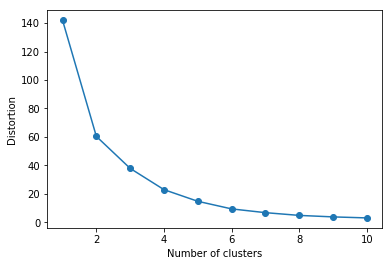

In [44]:
plt.plot(range(1, 11), dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [49]:
km = KMeans(n_clusters= 3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1007)
y_km = km.fit_predict(x)

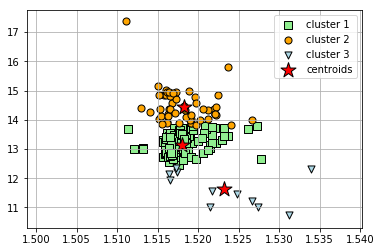

In [50]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

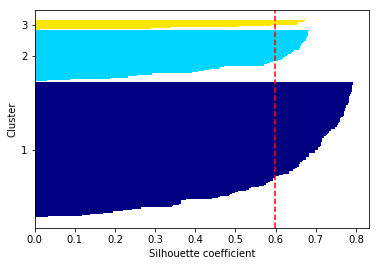

In [51]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=1007)
y_km = km.fit_predict(x)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()